In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from positional_sparse_linear import PositionalSparseLinear, PositionalSparseLinear2d
from utils import *

device = ("cuda" if torch.cuda.is_available() else "cpu")
print(device)
!nvidia-smi

Using /home/jl/.cache/torch_extensions/py312_cu121 as PyTorch extensions root...
Detected CUDA files, patching ldflags
Emitting ninja build file /home/jl/.cache/torch_extensions/py312_cu121/positional_sparse_linear_csrc/build.ninja...
/data/Projets/IA/experimentations/venv/lib/python3.12/site-packages/torch/utils/cpp_extension.py:1967: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Building extension module positional_sparse_linear_csrc...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)


ninja: no work to do.
cuda
Thu Jun 27 14:19:00 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.52.04              Driver Version: 555.52.04      CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 ...    Off |   00000000:01:00.0  On |                  N/A |
| N/A   49C    P3             13W /   80W |      51MiB /   6144MiB |     27%      Default |
|                                         |                        |                  N/A |
+--------------------

Loading extension module positional_sparse_linear_csrc...


In [2]:
train_transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
    ]
)

train_set = torchvision.datasets.MNIST('DATA_MNIST/', download=True, train=True, transform=train_transform)
trainLoader = torch.utils.data.DataLoader(train_set, batch_size=128, shuffle=True, num_workers=6)

validation_transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
    ]
)

validation_set = torchvision.datasets.MNIST('DATA_MNIST/', download=True, train=False, transform=validation_transform)
validationLoader = torch.utils.data.DataLoader(validation_set, batch_size=128, shuffle=True, num_workers=6)

print("Train size : ", len(train_set))
print("validation size : ", len(validation_set))

training_data = enumerate(trainLoader)
batch_idx, (images, labels) = next(training_data)

print(images.shape)
print(labels.shape)

for i in range(0,12):
    plt.subplot(3, 4, i+1)
    plt.imshow((images[i]/ 2 + 0.5).permute(1,2,0).numpy()); plt.axis('off')
    plt.title("label: " + str(labels[i].numpy().squeeze()))

Train size :  60000
validation size :  10000
torch.Size([128, 1, 28, 28])
torch.Size([128])


In [12]:
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.fc1 = nn.Linear(28*28, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        return x
    
model = LinearModel().to(device)
print(trainable_parameters(model))
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

7850


Epoch: 1/100   Train loss: 0.6656   Valid loss: 0.3818   Train acc: 0.8475   Valid acc: 0.9018   Elapsed time: 6.7571 sec   Time left: 668.9494 sec
Epoch: 2/100   Train loss: 0.3600   Valid loss: 0.3197   Train acc: 0.9035   Valid acc: 0.9134   Elapsed time: 11.7409 sec   Time left: 488.4069 sec
Epoch: 3/100   Train loss: 0.3182   Valid loss: 0.2985   Train acc: 0.9123   Valid acc: 0.9167   Elapsed time: 20.0586 sec   Time left: 806.7988 sec
Epoch: 4/100   Train loss: 0.2987   Valid loss: 0.2844   Train acc: 0.9173   Valid acc: 0.9209   Elapsed time: 26.6494 sec   Time left: 632.6938 sec
Epoch: 5/100   Train loss: 0.2870   Valid loss: 0.2759   Train acc: 0.9205   Valid acc: 0.9231   Elapsed time: 33.8497 sec   Time left: 684.0152 sec
Epoch: 6/100   Train loss: 0.2792   Valid loss: 0.2774   Train acc: 0.9219   Valid acc: 0.9239   Elapsed time: 42.4191 sec   Time left: 805.5188 sec
Epoch: 7/100   Train loss: 0.2731   Valid loss: 0.2699   Train acc: 0.9240   Valid acc: 0.9240   Elapsed ti

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x79f6004d20c0>
Traceback (most recent call last):
  File "/data/Projets/IA/experimentations/venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/data/Projets/IA/experimentations/venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process


Epoch: 67/100   Train loss: 0.2274   Valid loss: 0.2715   Train acc: 0.9369   Valid acc: 0.9288   Elapsed time: 459.1904 sec   Time left: 250.8062 sec
Epoch: 68/100   Train loss: 0.2270   Valid loss: 0.2767   Train acc: 0.9376   Valid acc: 0.9273   Elapsed time: 465.6821 sec   Time left: 207.7297 sec
Epoch: 69/100   Train loss: 0.2271   Valid loss: 0.2745   Train acc: 0.9373   Valid acc: 0.9274   Elapsed time: 472.4165 sec   Time left: 208.7580 sec
Epoch: 70/100   Train loss: 0.2267   Valid loss: 0.2795   Train acc: 0.9376   Valid acc: 0.9276   Elapsed time: 481.1172 sec   Time left: 261.0155 sec
Epoch: 71/100   Train loss: 0.2267   Valid loss: 0.2750   Train acc: 0.9379   Valid acc: 0.9276   Elapsed time: 487.8944 sec   Time left: 196.5326 sec
Epoch: 72/100   Train loss: 0.2264   Valid loss: 0.2743   Train acc: 0.9372   Valid acc: 0.9270   Elapsed time: 496.4973 sec   Time left: 240.8776 sec
Epoch: 73/100   Train loss: 0.2263   Valid loss: 0.2747   Train acc: 0.9371   Valid acc: 0.927

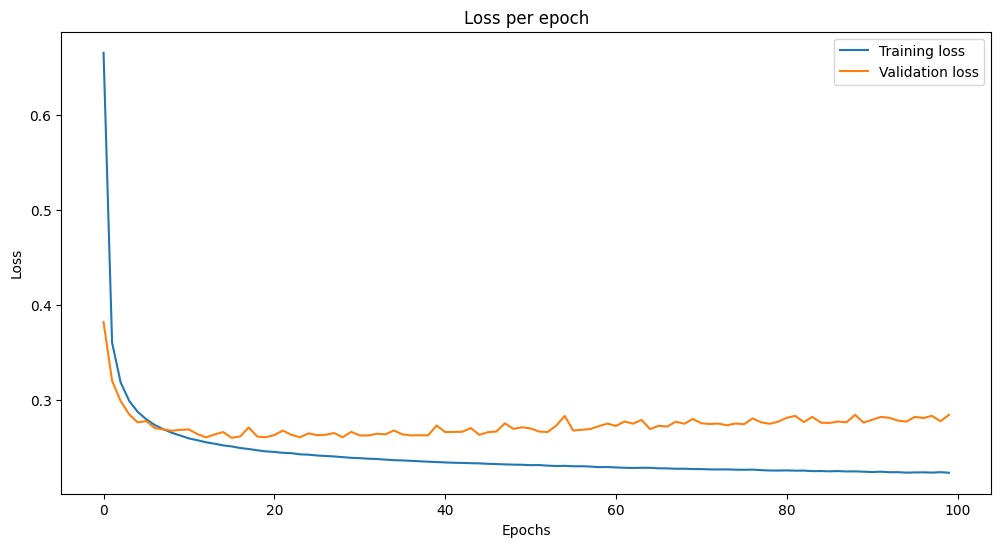

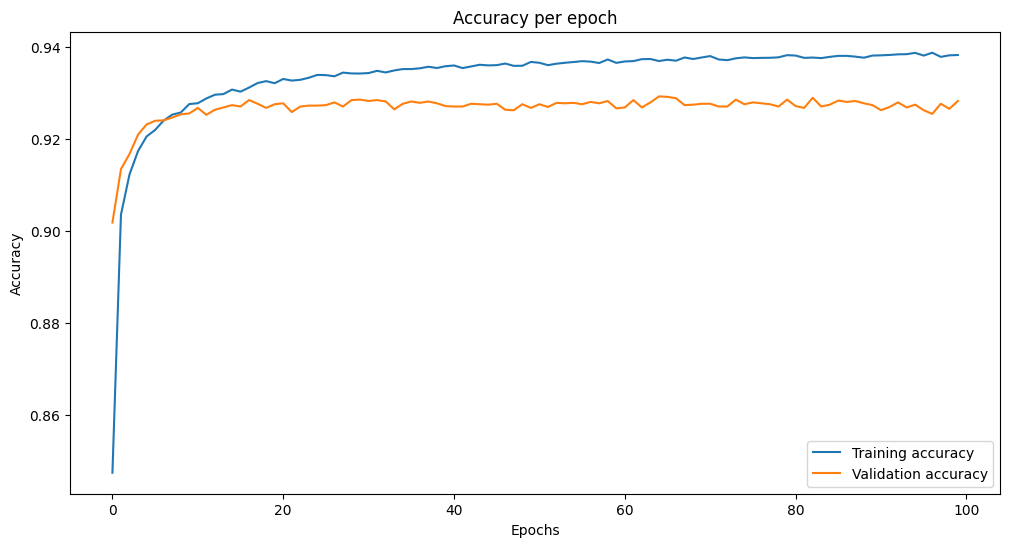

Accuracy of basic linear model:  0.9282


In [13]:
train_loss, val_loss, accuracy_total_train, accuracy_total_val, total_time = train_model(
    model,
    trainLoader,
    validationLoader,
    train_set,
    validation_set,
    criterion,
    optimizer,
    device,
    "model/",
    0,
    100
)

plot_loss(train_loss, val_loss)
plot_accuracy(accuracy_total_train, accuracy_total_val)
print("Accuracy of basic linear model: ", test_accuracy(model, validationLoader, validation_set, device))

In [14]:
class SparseLinearModel(nn.Module):
    def __init__(self):
        super(SparseLinearModel, self).__init__()
        self.fc1 = PositionalSparseLinear(28 * 28, 256, 14, 0.1)
        self.fc2 = PositionalSparseLinear(256, 256, 8, 0.1)
        self.fc3 = PositionalSparseLinear(256, 256, 8, 0.1)
        self.fc4 = PositionalSparseLinear(256, 10, 32, 0.1)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
    
model = SparseLinearModel().to(device)
print(trainable_parameters(model))
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

8000


Epoch: 1/100   Train loss: 1.2382   Valid loss: 0.4043   Train acc: 0.6371   Valid acc: 0.8864   Elapsed time: 7.5847 sec   Time left: 750.8876 sec
Epoch: 2/100   Train loss: 0.3527   Valid loss: 0.2876   Train acc: 0.8995   Valid acc: 0.9178   Elapsed time: 16.7948 sec   Time left: 902.5642 sec
Epoch: 3/100   Train loss: 0.2783   Valid loss: 0.2505   Train acc: 0.9204   Valid acc: 0.9274   Elapsed time: 25.1371 sec   Time left: 809.1955 sec
Epoch: 4/100   Train loss: 0.2423   Valid loss: 0.2351   Train acc: 0.9315   Valid acc: 0.9345   Elapsed time: 33.4164 sec   Time left: 794.7956 sec
Epoch: 5/100   Train loss: 0.2193   Valid loss: 0.2074   Train acc: 0.9378   Valid acc: 0.9385   Elapsed time: 40.0914 sec   Time left: 634.1035 sec
Epoch: 6/100   Train loss: 0.2015   Valid loss: 0.1955   Train acc: 0.9431   Valid acc: 0.9411   Elapsed time: 46.3426 sec   Time left: 587.5953 sec
Epoch: 7/100   Train loss: 0.1877   Valid loss: 0.1892   Train acc: 0.9471   Valid acc: 0.9434   Elapsed ti

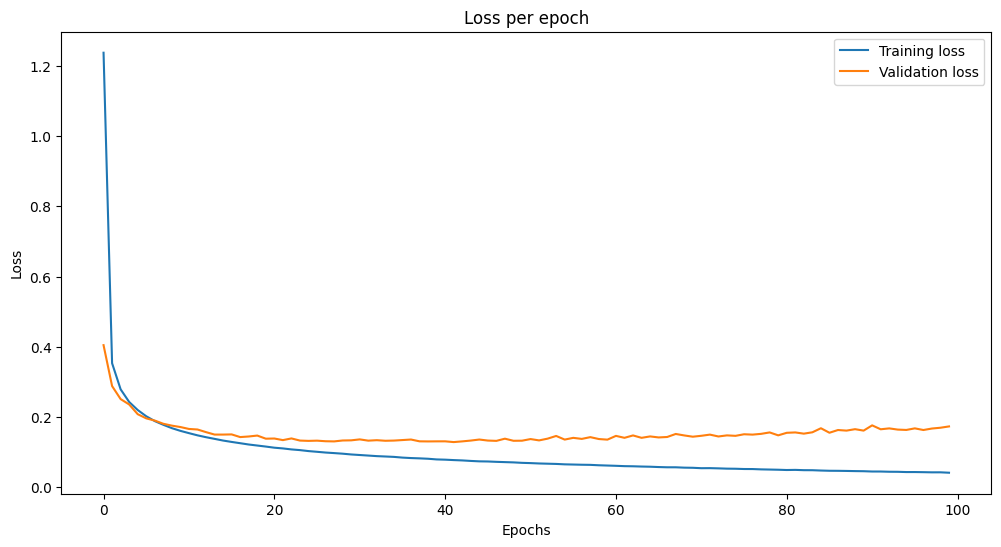

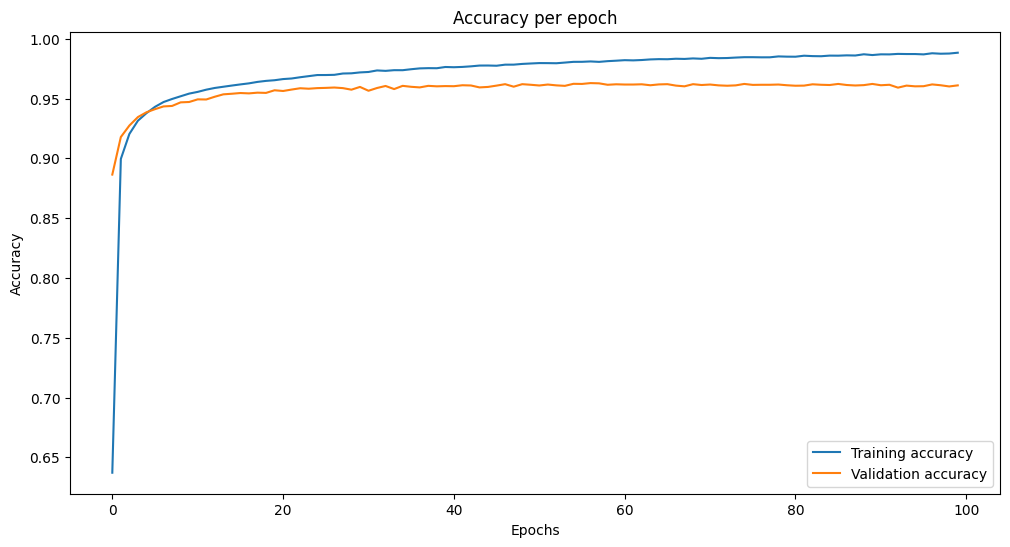

Accuracy of basic linear model:  0.961


In [15]:
train_loss, val_loss, accuracy_total_train, accuracy_total_val, total_time = train_model(
    model,
    trainLoader,
    validationLoader,
    train_set,
    validation_set,
    criterion,
    optimizer,
    device,
    "model/",
    0,
    100
)

plot_loss(train_loss, val_loss)
plot_accuracy(accuracy_total_train, accuracy_total_val)
print("Accuracy of basic linear model: ", test_accuracy(model, validationLoader, validation_set, device))

In [8]:
class SparseLinear2dModel(nn.Module):
    def __init__(self):
        super(SparseLinear2dModel, self).__init__()
        self.fc1 = PositionalSparseLinear2d(28, 28, 16, 16, 14, 0.1)
        self.fc2 = PositionalSparseLinear2d(16, 16, 16, 16, 8, 0.1)
        self.fc3 = PositionalSparseLinear2d(16, 16, 16, 16, 8, 0.1)
        self.fc4 = PositionalSparseLinear(16 * 16, 10, 32, 0.1)

    def forward(self, x):
        x = x.view(-1, 28, 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = x.view(-1, 16 * 16)
        x = self.fc4(x)
        return x
    
model = SparseLinear2dModel().to(device)
print(trainable_parameters(model))
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

8000


Epoch: 1/100   Train loss: 1.2452   Valid loss: 0.4416   Train acc: 0.6453   Valid acc: 0.8739   Elapsed time: 5.2641 sec   Time left: 521.1473 sec
Epoch: 2/100   Train loss: 0.3895   Valid loss: 0.3263   Train acc: 0.8846   Valid acc: 0.9068   Elapsed time: 10.4486 sec   Time left: 508.0691 sec
Epoch: 3/100   Train loss: 0.3152   Valid loss: 0.2846   Train acc: 0.9076   Valid acc: 0.9173   Elapsed time: 18.5034 sec   Time left: 781.3076 sec
Epoch: 4/100   Train loss: 0.2766   Valid loss: 0.2564   Train acc: 0.9191   Valid acc: 0.9271   Elapsed time: 27.2146 sec   Time left: 836.2470 sec
Epoch: 5/100   Train loss: 0.2512   Valid loss: 0.2417   Train acc: 0.9266   Valid acc: 0.9320   Elapsed time: 33.9935 sec   Time left: 643.9714 sec
Epoch: 6/100   Train loss: 0.2327   Valid loss: 0.2297   Train acc: 0.9314   Valid acc: 0.9359   Elapsed time: 40.9389 sec   Time left: 652.8546 sec
Epoch: 7/100   Train loss: 0.2181   Valid loss: 0.2154   Train acc: 0.9365   Valid acc: 0.9387   Elapsed ti

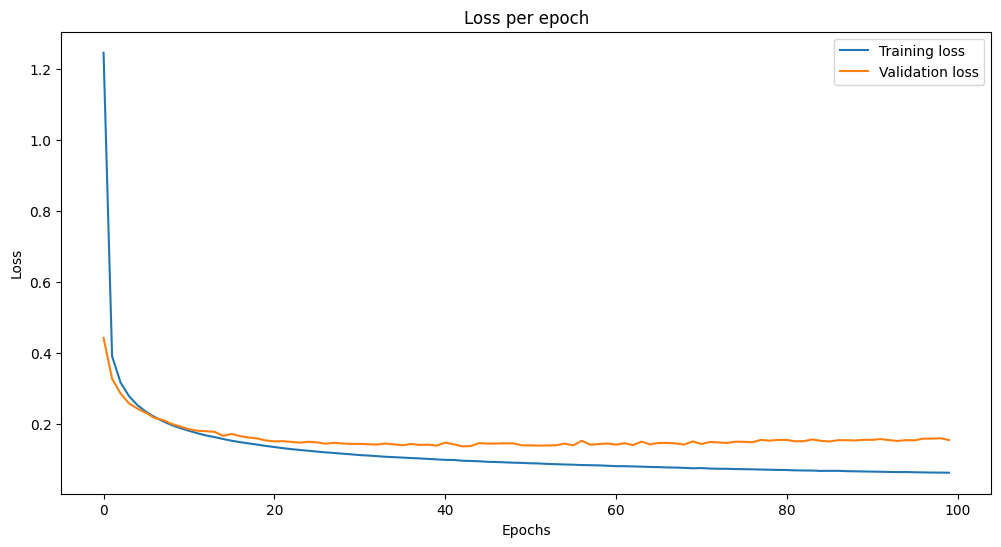

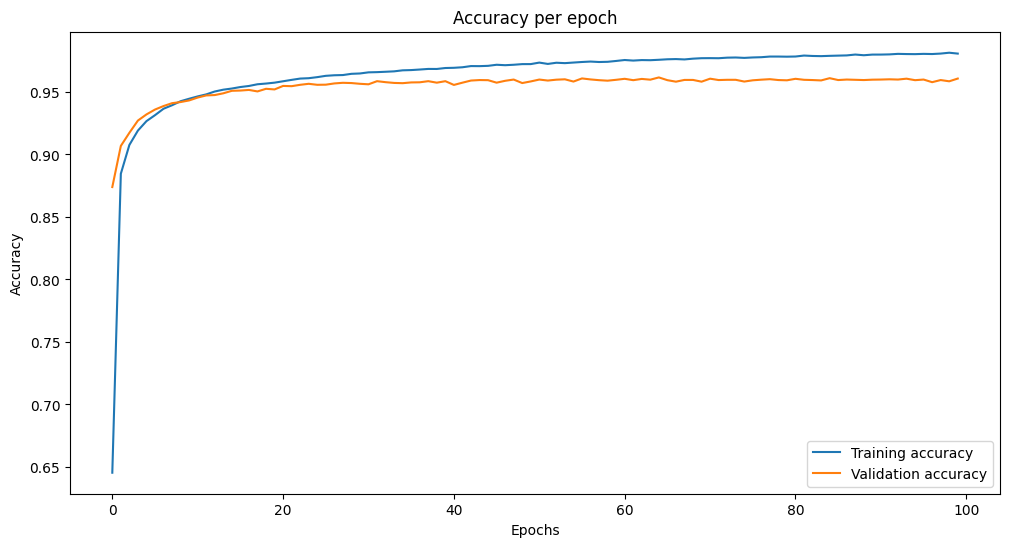

Accuracy of basic linear 2d model:  0.9607


In [9]:
train_loss, val_loss, accuracy_total_train, accuracy_total_val, total_time = train_model(
    model,
    trainLoader,
    validationLoader,
    train_set,
    validation_set,
    criterion,
    optimizer,
    device,
    "model/",
    0,
    100
)

plot_loss(train_loss, val_loss)
plot_accuracy(accuracy_total_train, accuracy_total_val)
print("Accuracy of basic linear 2d model: ", test_accuracy(model, validationLoader, validation_set, device))

Files already downloaded and verified
Files already downloaded and verified
Train size :  50000
validation size :  10000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7091274..1.7739834].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.31095093..1.8768656].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.71453285..1.7606239].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.3755197..1.557477].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.49859893..1.7956666].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.55132484..1.7897279].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.631

torch.Size([128, 3, 32, 32])
torch.Size([128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.36927903..1.8439628].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.3561213..0.7984859].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.64827967..1.7053585].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.60444045..1.3050144].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.69725597..1.7277455].


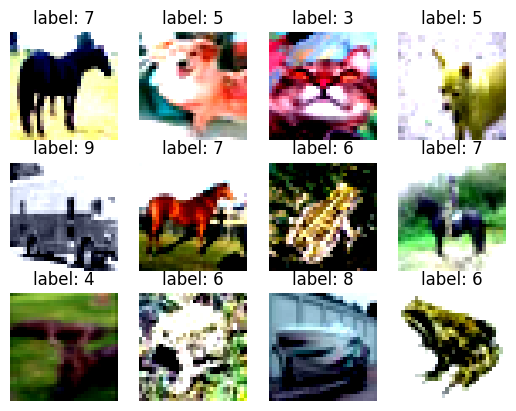

In [2]:
train_transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.RandomHorizontalFlip(),
        # torchvision.transforms.RandomCrop(32, padding=4),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
        torchvision.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
    ]
)

train_set = torchvision.datasets.CIFAR10('DATA_CIFAR/', download=True, train=True, transform=train_transform)
trainLoader = torch.utils.data.DataLoader(train_set, batch_size=128, shuffle=True, num_workers=6)

validation_transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ]
)

validation_set = torchvision.datasets.CIFAR10('DATA_CIFAR/', download=True, train=False, transform=validation_transform)
validationLoader = torch.utils.data.DataLoader(validation_set, batch_size=128, shuffle=True, num_workers=6)

print("Train size : ", len(train_set))
print("validation size : ", len(validation_set))

training_data = enumerate(trainLoader)
batch_idx, (images, labels) = next(training_data)

print(images.shape)
print(labels.shape)

for i in range(0,12):
    plt.subplot(3, 4, i+1)
    plt.imshow((images[i]/ 2 + 0.5).permute(1,2,0).numpy()); plt.axis('off')
    plt.title("label: " + str(labels[i].numpy().squeeze()))

In [6]:
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 10)

    def forward(self, x):
        x = x.view(-1, 32*32*3)
        x = self.fc1(x)
        return x
    
model = LinearModel().to(device)
print(trainable_parameters(model))
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

30730


Epoch: 1/100   Train loss: 1.9911   Valid loss: 1.9286   Train acc: 0.3294   Valid acc: 0.3414   Elapsed time: 16.4113 sec   Time left: 1624.7203 sec
Epoch: 2/100   Train loss: 1.9394   Valid loss: 1.8950   Train acc: 0.3455   Valid acc: 0.3363   Elapsed time: 31.8361 sec   Time left: 1511.6126 sec
Epoch: 3/100   Train loss: 1.9218   Valid loss: 1.8725   Train acc: 0.3537   Valid acc: 0.3499   Elapsed time: 46.6379 sec   Time left: 1435.7626 sec
Epoch: 4/100   Train loss: 1.9257   Valid loss: 1.8768   Train acc: 0.3500   Valid acc: 0.3552   Elapsed time: 59.7020 sec   Time left: 1254.1428 sec
Epoch: 5/100   Train loss: 1.9135   Valid loss: 1.9106   Train acc: 0.3563   Valid acc: 0.3503   Elapsed time: 74.2523 sec   Time left: 1382.2698 sec
Epoch: 6/100   Train loss: 1.9023   Valid loss: 2.0153   Train acc: 0.3586   Valid acc: 0.3293   Elapsed time: 88.1109 sec   Time left: 1302.6856 sec
Epoch: 7/100   Train loss: 1.9091   Valid loss: 1.9231   Train acc: 0.3576   Valid acc: 0.3396   Ela

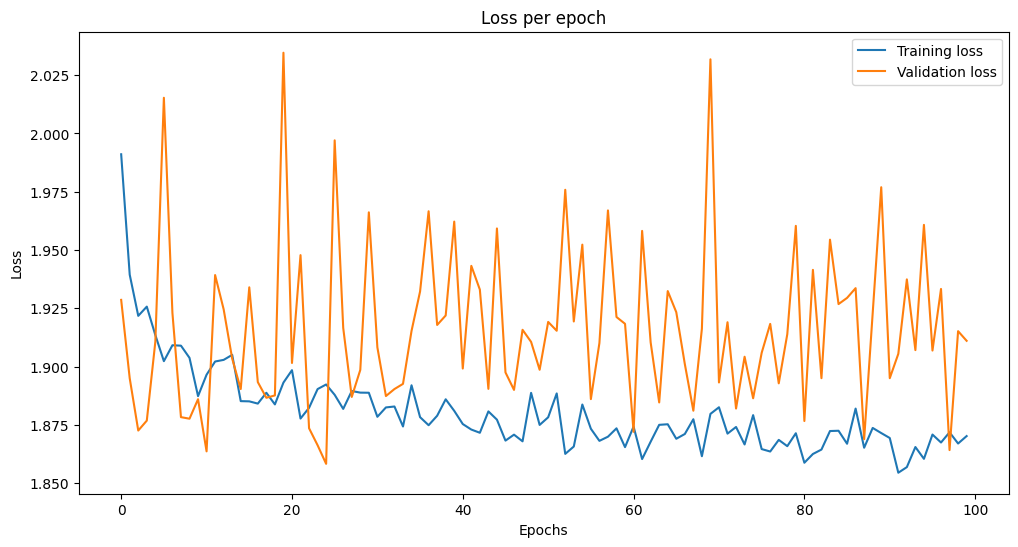

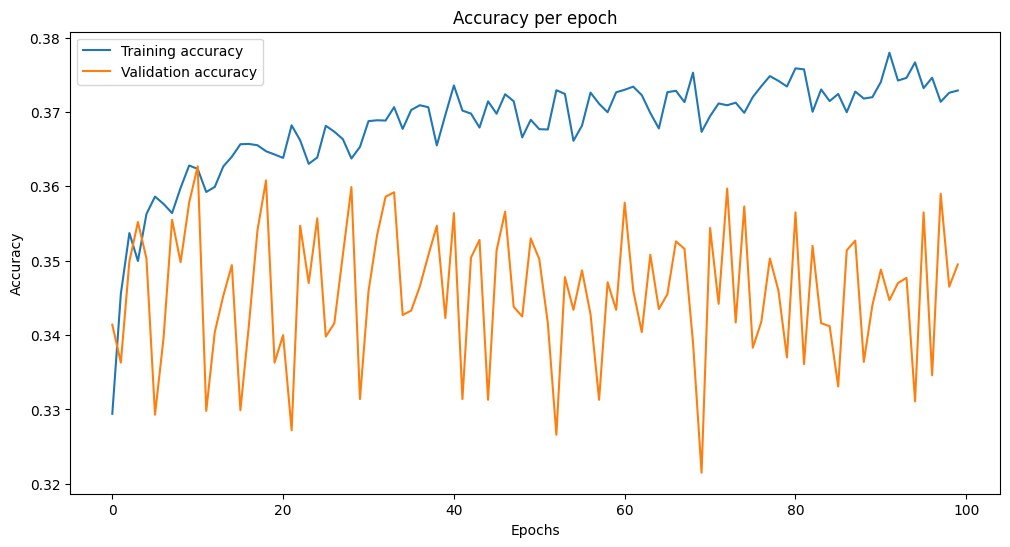

Accuracy of basic linear model:  0.3495


In [7]:
train_loss, val_loss, accuracy_total_train, accuracy_total_val, total_time = train_model(
    model,
    trainLoader,
    validationLoader,
    train_set,
    validation_set,
    criterion,
    optimizer,
    device,
    "model/",
    0,
    100
)

plot_loss(train_loss, val_loss)
plot_accuracy(accuracy_total_train, accuracy_total_val)
print("Accuracy of basic linear model: ", test_accuracy(model, validationLoader, validation_set, device))

In [16]:
class SparseLinearModel(nn.Module):
    def __init__(self):
        super(SparseLinearModel, self).__init__()
        self.fc1 = PositionalSparseLinear(32 * 32 * 3, 512, 32, 0.1)
        self.fc2 = PositionalSparseLinear(512, 512, 16, 0.1)
        self.fc3 = PositionalSparseLinear(512, 512, 16, 0.1)
        self.fc4 = PositionalSparseLinear(512, 10, 64, 0.1)

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
    
model = SparseLinearModel().to(device)
print(trainable_parameters(model))
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

33408


Epoch: 1/100   Train loss: 1.9176   Valid loss: 1.7308   Train acc: 0.3177   Valid acc: 0.3953   Elapsed time: 18.2059 sec   Time left: 1802.3833 sec
Epoch: 2/100   Train loss: 1.6581   Valid loss: 1.6224   Train acc: 0.4195   Valid acc: 0.4342   Elapsed time: 37.8513 sec   Time left: 1925.2204 sec
Epoch: 3/100   Train loss: 1.5850   Valid loss: 1.5722   Train acc: 0.4452   Valid acc: 0.4552   Elapsed time: 54.8412 sec   Time left: 1648.0042 sec
Epoch: 4/100   Train loss: 1.5354   Valid loss: 1.5349   Train acc: 0.4605   Valid acc: 0.4654   Elapsed time: 71.4475 sec   Time left: 1594.1922 sec
Epoch: 5/100   Train loss: 1.4991   Valid loss: 1.5068   Train acc: 0.4749   Valid acc: 0.4711   Elapsed time: 86.7358 sec   Time left: 1452.3633 sec
Epoch: 6/100   Train loss: 1.4659   Valid loss: 1.4859   Train acc: 0.4887   Valid acc: 0.4823   Elapsed time: 102.5286 sec   Time left: 1484.5056 sec
Epoch: 7/100   Train loss: 1.4401   Valid loss: 1.4672   Train acc: 0.4984   Valid acc: 0.4880   El

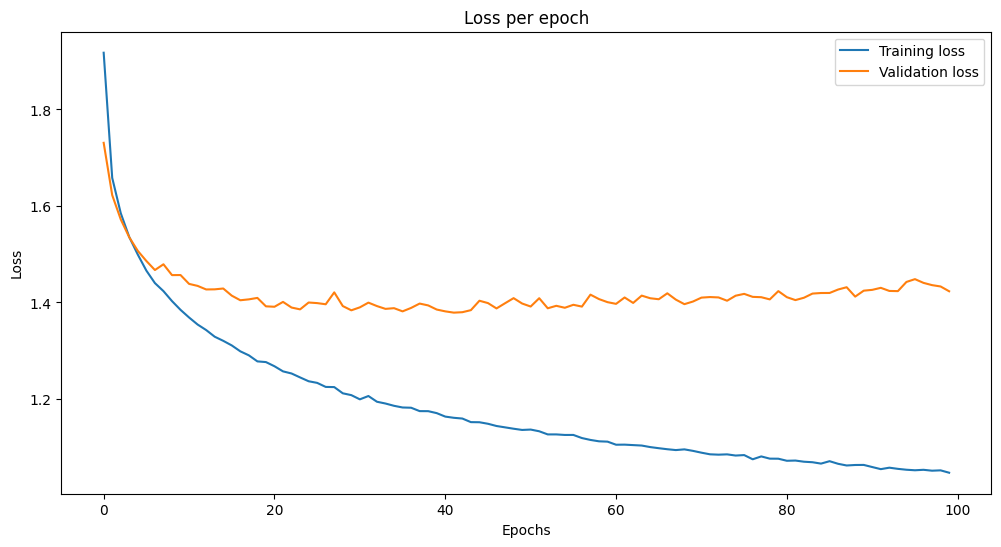

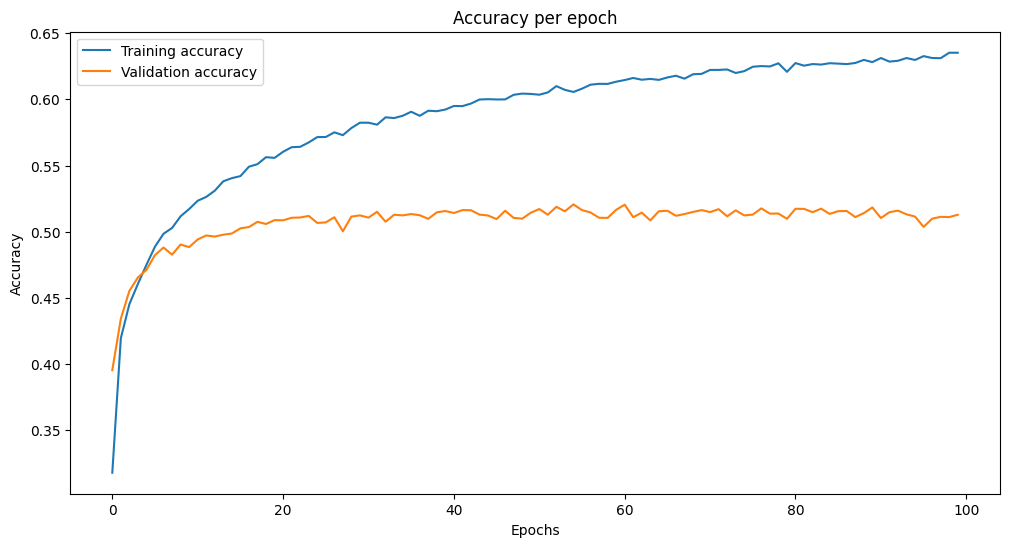

Accuracy of basic linear model:  0.5128


In [17]:
train_loss, val_loss, accuracy_total_train, accuracy_total_val, total_time = train_model(
    model,
    trainLoader,
    validationLoader,
    train_set,
    validation_set,
    criterion,
    optimizer,
    device,
    "model/",
    0,
    100
)

plot_loss(train_loss, val_loss)
plot_accuracy(accuracy_total_train, accuracy_total_val)
print("Accuracy of basic linear model: ", test_accuracy(model, validationLoader, validation_set, device))

In [10]:
class SparseLinear2dModel(nn.Module):
    def __init__(self):
        super(SparseLinear2dModel, self).__init__()
        self.fc1 = PositionalSparseLinear2d(32 * 3, 32, 24, 24, 28, 0.1)
        self.fc2 = PositionalSparseLinear2d(24, 24, 24, 24, 14, 0.1)
        self.fc3 = PositionalSparseLinear2d(24, 24, 24, 24, 14, 0.1)
        self.fc4 = PositionalSparseLinear(24 * 24, 10, 64, 0.1, True)

    def forward(self, x):
        x = x.permute(0, 2, 3, 1).reshape(-1, 32 * 3, 32)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = x.view(-1, 24 * 24)
        x = self.fc4(x)
        return x
    
model = SparseLinear2dModel().to(device)
print(trainable_parameters(model))
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

32896


In [11]:
train_loss, val_loss, accuracy_total_train, accuracy_total_val, total_time = train_model(
    model,
    trainLoader,
    validationLoader,
    train_set,
    validation_set,
    criterion,
    optimizer,
    device,
    "model/",
    0,
    100
)

plot_loss(train_loss, val_loss)
plot_accuracy(accuracy_total_train, accuracy_total_val)
print("Accuracy of basic linear 2d model: ", test_accuracy(model, validationLoader, validation_set, device))

Epoch: 1/100   Train loss: 1.9183   Valid loss: 1.7279   Train acc: 0.3203   Valid acc: 0.3969   Elapsed time: 14.8575 sec   Time left: 1470.8918 sec
Epoch: 2/100   Train loss: 1.6637   Valid loss: 1.6215   Train acc: 0.4170   Valid acc: 0.4348   Elapsed time: 31.0038 sec   Time left: 1582.3055 sec
Epoch: 3/100   Train loss: 1.5856   Valid loss: 1.5723   Train acc: 0.4441   Valid acc: 0.4492   Elapsed time: 46.5718 sec   Time left: 1510.0911 sec
Epoch: 4/100   Train loss: 1.5383   Valid loss: 1.5414   Train acc: 0.4626   Valid acc: 0.4588   Elapsed time: 62.0633 sec   Time left: 1487.1508 sec
Epoch: 5/100   Train loss: 1.5033   Valid loss: 1.5116   Train acc: 0.4739   Valid acc: 0.4691   Elapsed time: 76.4682 sec   Time left: 1368.4525 sec
Epoch: 6/100   Train loss: 1.4730   Valid loss: 1.4846   Train acc: 0.4857   Valid acc: 0.4785   Elapsed time: 91.8477 sec   Time left: 1445.6618 sec


KeyboardInterrupt: 